# Pymaceuticals Inc.
---

### Analysis

- There is a total of 248 mice in the study.  There are 10 different cancer treatments in the study.  The distribution of mice by gender is nearly evenly split with males slightly over numbering females. Based on a single mouse (b128) in the Capomulin regiment a correlation between time and decreased size in tumor volume (mm3) can be witnessed. The tumor volume based on weight (g) of the mouse has a positive correlation (~84%) of larger tumor size based on the size of the mouse.
 

In [1262]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1263]:
# Checking the number of mice.
count_df = combined_df['Mouse ID'].nunique()

count_df


249

In [1264]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1265]:
# Optional: Get all the data for the duplicate mouse ID. 


In [1266]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1267]:
# Checking the number of mice in the clean DataFrame.
clean_df = clean_df['Mouse ID'].nunique()
clean_df

249

## Summary Statistics

In [1268]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM'] 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1269]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_group_df = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

# Using the aggregation method, produce the same summary statistics in a single line
drug_group_df.columns = ['Count', 'Mean', 'Standard Deviation', 'Minimum', "25%", "50%", "75%", 'Maximum']

drug_group_df

,Count,Mean,Standard Deviation,Minimum,25%,50%,75%,Maximum
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

Text(0, 0.5, 'Total Number')

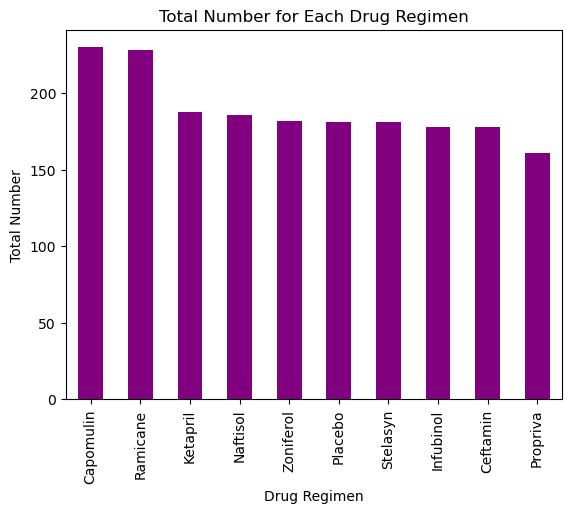

In [1270]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = combined_df['Drug Regimen'].value_counts()
drug_count.plot(kind='bar', color='purple')
plt.title('Total Number for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number')

Text(0, 0.5, 'Total Number')

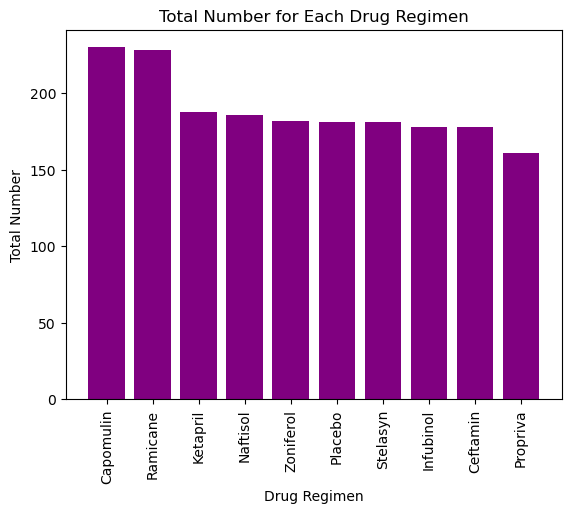

In [1271]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = combined_df['Drug Regimen'].value_counts()
plt.bar(drug_count.index, drug_count.values, color='purple')
plt.xticks(rotation=90)
plt.title('Total Number for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number')

Text(0.5, 1.0, 'Gender Distributon of Female vs Male Mice')

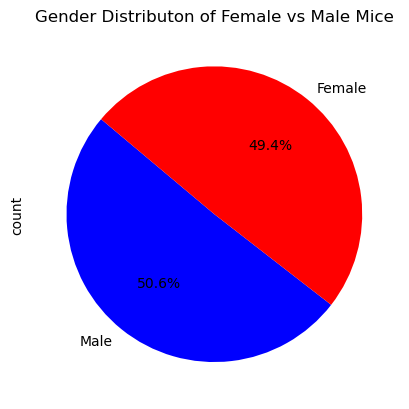

In [1272]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = combined_df['Sex'].value_counts()
gender_count.plot(kind='pie', colors=['blue', 'red'], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distributon of Female vs Male Mice')

Text(0.5, 1.0, 'Gender Distributon of Female vs Male Mice')

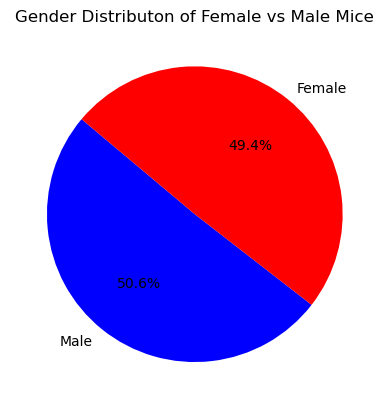

In [1273]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = combined_df['Sex'].value_counts()
plt.pie(gender_count, labels=gender_count.index, colors=['blue', 'red'], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distributon of Female vs Male Mice')


## Quartiles, Outliers and Boxplots

In [1274]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = []

# Start by getting the last (greatest) timepoint for each mouse
for regimen in drug_regimens:
    regimen_df = combined_df[combined_df['Drug Regimen'] == regimen]
    timepoints = regimen_df.groupby('Mouse ID')['Timepoint'].max()
    final_tumor_df = pd.merge(timepoints, combined_df, on=['Mouse ID', 'Timepoint'], how='left')
    final_tumor_volumes.append(final_tumor_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.concat(final_tumor_volumes)

final_tumor_volume_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,b128,Capomulin,38.982878
1,b742,Capomulin,38.939633
2,f966,Capomulin,30.485985
3,g288,Capomulin,37.074024
4,g316,Capomulin,40.159220
...,...,...,...
20,x226,Ceftamin,45.000000
21,x581,Ceftamin,64.634949
22,x822,Ceftamin,61.386660
23,y769,Ceftamin,68.594745


In [1275]:
# List of treatments for the loop and later for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

for treatment in treatments:

    treatment_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]
    

    tumor_volumes = treatment_df['Tumor Volume (mm3)']
    
    tumor_volume_data.append(tumor_volumes)
    
   
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
# Determine outliers using upper and lower bounds

    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | 
                             (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"Results for {treatment}:")
    print(f"IQR: {iqr}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of potential outliers: {len(outliers)}\n")

Results for Capomulin:
IQR: 7.781863460000004
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Number of potential outliers: 0

Results for Ramicane:
IQR: 9.098536719999998
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Number of potential outliers: 0

Results for Infubinol:
IQR: 11.477135160000003
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Number of potential outliers: 1

Results for Ceftamin:
IQR: 15.577752179999997
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Number of potential outliers: 0



Text(0.5, 1.0, 'Distribution of Tumor Volume (mm3) per Treatment Group')

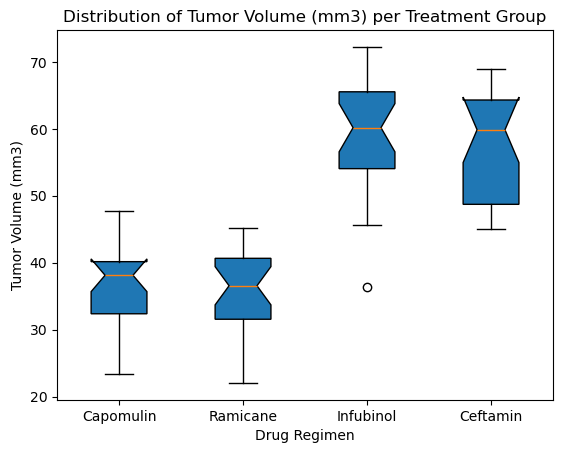

In [1276]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments, patch_artist=True, notch=True, vert=True)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume (mm3) per Treatment Group')

## Line and Scatter Plots

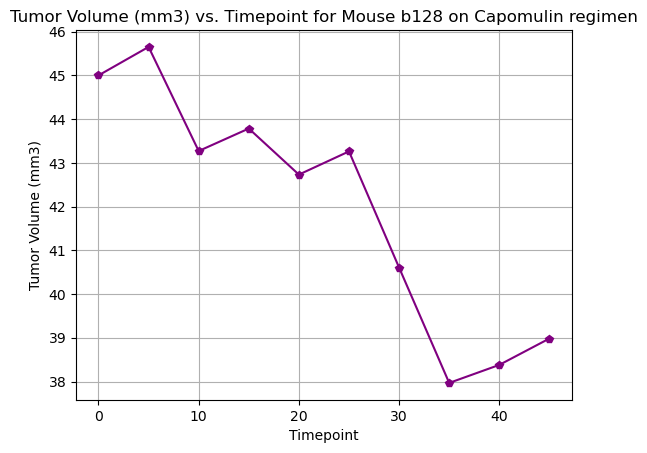

In [1277]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

mouse_id = 'b128'

mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='p', color='purple')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume (mm3) vs. Timepoint for Mouse {mouse_id} on Capomulin regimen')
plt.grid(True)


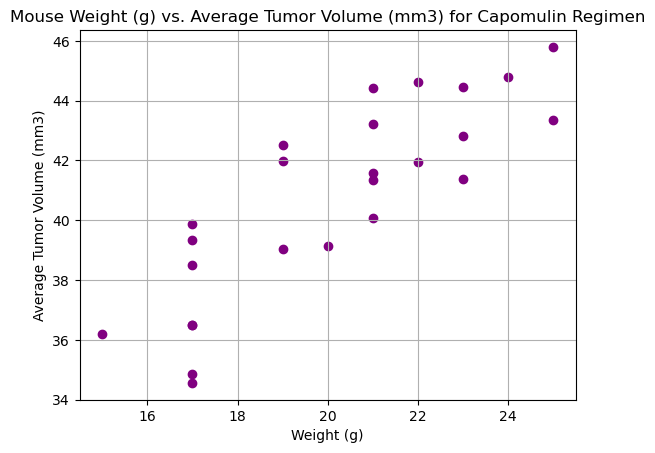

In [1278]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combined_df[combined_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].unique().apply(lambda x: x[0])
plt.scatter(mouse_weight, average_tumor_volume, color='purple')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight (g) vs. Average Tumor Volume (mm3) for Capomulin Regimen')
plt.grid(True)

## Correlation and Regression

Correlation Coefficient: 0.8419363424694719
Linear Regression Model:
Slope: 0.9544396890241048
Intercept: 21.552160532685008
R-squared Value: 0.7088568047708723
p-value: 1.3225722434712404e-07


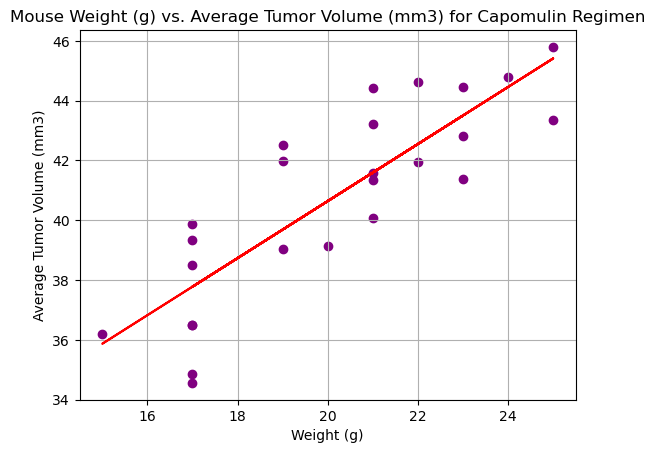

In [1279]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = st.pearsonr(mouse_weight, average_tumor_volume)
print(f"Correlation Coefficient: {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

print(f"Linear Regression Model:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared Value: {r_value**2}")
print(f"p-value: {p_value}")

regress_values = mouse_weight * slope + intercept

plt.scatter(mouse_weight, average_tumor_volume, color='purple')
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight (g) vs. Average Tumor Volume (mm3) for Capomulin Regimen')
plt.grid(True)